In [2]:
import networkx as nx
%matplotlib inline

In [3]:
nx.__version__

'3.1'

#### PART 1 - Network generation and characteristics *(30 points)*

1. Using the Python package networkx, define a network that represents the social network of friends in the diagram. *(15 points)*  

2. Calculate the ff. network characteristics: *(15 points; 5 points each)*
- Diameter
- Density
- Average Degree

3. Create the degree distribution plot and briefly discuss what it tells us about this social network. *(10 points)*

Diameter: 4
Density: 0.4
Average Degree: 3.6


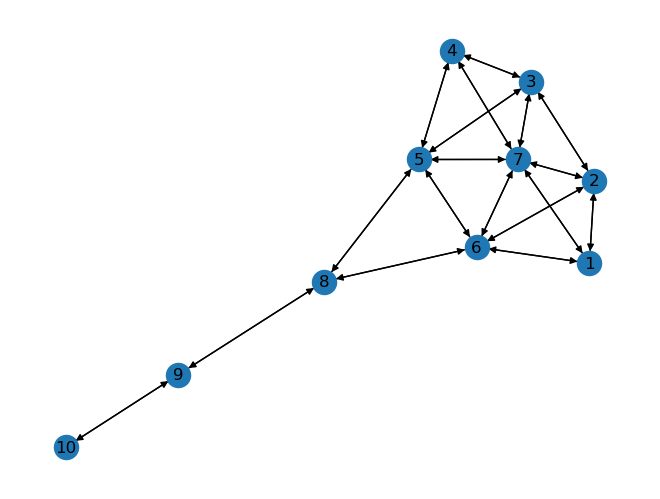

In [11]:
import networkx as nx

# Defining the network
D = nx.DiGraph()
D.add_edges_from([(1,2),(1,6),(1,7),
                  (2,1),(2,3),(2,6),(2,7),
                  (3,2),(3,4),(3,5),(3,7),
                  (4,3),(4,5),(4,7),
                  (5,3),(5,4),(5,6),(5,7),(5,8),
                  (6,1),(6,2),(6,5),(6,7),(6,8),
                  (7,1),(7,2),(7,3),(7,4),(7,5),(7,6),
                  (8,5),(8,6),(8,9),
                  (9,8),(9,10),(10,9)
                 ])
nx.draw(D, with_labels=True)
largest_scc = max(nx.strongly_connected_components(D), key=len)
largest_scc_subgraph = D.subgraph(largest_scc)

diameter = nx.diameter(largest_scc_subgraph)

density = nx.density(D)

avg_degree = sum(dict(D.in_degree()).values()) / len(D)

print("Diameter:", diameter)
print("Density:", density)
print("Average Degree:", avg_degree)


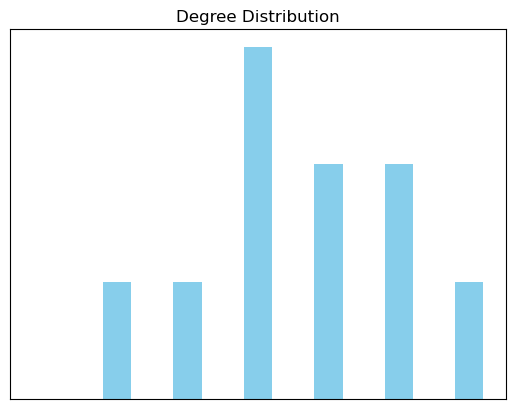

In [15]:
degree_sequence = [d for n, d in D.degree()]
degree_count = nx.degree_histogram(D)

plt.bar(range(len(degree_count)), degree_count, color='skyblue')
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False,
                labelbottom=False, labelleft=False)
plt.title('Degree Distribution')
plt.show()

The degree distribution plot lets us see the number of nodes with a certain degree in the network. As we look at the graph, we can notice that most nodes have a degree of 2 or 3 and few nodes even have higher degrees. This means that the majority of the individuals in the social network have small "friends" or connections. Higher degree mean more number of friends or connections.s.

#### PART 2 - Centrality Measures *(30 points)*

Generate a table of centrality measures per node. Columns are:
- Name
- Degree Centrality
- Betweenness Centrality
- Closeness Centrality

Briefly discuss who are the most "central" people in the social network and why.

In [17]:
import pandas as pd

# Calculating centrality measures
degree_centrality = nx.degree_centrality(D)
betweenness_centrality = nx.betweenness_centrality(D)
closeness_centrality = nx.closeness_centrality(D)

# Creating a DataFrame
centrality_df = pd.DataFrame({
    'Name': list(D.nodes()),
    'Degree Centrality': [degree_centrality[node] for node in D.nodes()],
    'Betweenness Centrality': [betweenness_centrality[node] for node in D.nodes()],
    'Closeness Centrality': [closeness_centrality[node] for node in D.nodes()]
})

# Printing the DataFrame
print(centrality_df)

   Name  Degree Centrality  Betweenness Centrality  Closeness Centrality
0     1           0.666667                0.000000              0.500000
1     2           0.888889                0.023148              0.529412
2     6           1.111111                0.231481              0.642857
3     7           1.333333                0.101852              0.600000
4     3           0.888889                0.023148              0.529412
5     4           0.666667                0.000000              0.500000
6     5           1.111111                0.231481              0.642857
7     8           0.666667                0.388889              0.600000
8     9           0.444444                0.222222              0.428571
9    10           0.222222                0.000000              0.310345


The most central people in the social network are the ones who score high on multiple centrality measures. These people are more likely to be connected and they frequently act as intermediaries between different groups.

#### PART 3 - Identify communities *(40 points)*

1. Identify communities in the social network using *(30 points)*:
- Louvain community detection algorithm
- Any other community detection algorithm of your choice

2. Calculate the modularity of the partitions from the two community detection algorithms. *(10 points)*

Briefly describe the algorithm you used and compare the results from the two algorithms.

In [52]:
from networkx.algorithms.community import girvan_newman
from networkx.algorithms.community import greedy_modularity_communities
import community

In [53]:
louvain_partition = community.best_partition(D)
girvan_newman_communities = tuple(greedy_modularity_communities(D))

modularity_louvain = community.modularity(louvain_partition, D)
modularity_girvan_newman = nx.algorithms.community.quality.modularity(D, girvan_newman_communities)

print("Modularity (Louvain):", modularity_louvain)
print("Modularity (Girvan-Newman):", modularity_girvan_newman)

Modularity (Louvain): 0.22222222222222218
Modularity (Girvan-Newman): 0.2222222222222222


Louvain algorithm is an unsupervised algorithm that reveals a hierarchy of communities at different scales and it aims to optimize an objective function of the whole network so it can effectively identify the community structure.

Girvan-Newman algorithm is a heirarchal method that detects communities by progressivley removing edges that have the highest number of shortest paths between nodes passing through them.

The modularity scores are almost the same, which indicates that both Louvain and Girvan-Newman algorithms have effectively partitioned the network into communities with comparable strengths of intra-community connections relative to inter-community connections. 
